In [1]:
%matplotlib inline
import pandas as pd
from datetime import datetime
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from IPython.display import display, HTML
from table_format import *

In [2]:
# READ FROM CSV
data = pd.read_csv("data/communities.csv")
print(data)

        date  instr_proj  instr_user  thing_proj  thing_user  i_cum_proj  \
0     1/1/05           0           0         NaN         NaN           0   
1     1/2/05           0           0         NaN         NaN           0   
2     1/3/05           0           8         NaN         NaN           0   
3     1/4/05           0           1         NaN         NaN           0   
4     1/5/05           0           0         NaN         NaN           0   
5     1/6/05           0           0         NaN         NaN           0   
6     1/7/05           0           0         NaN         NaN           0   
7     1/8/05          78          39         NaN         NaN          78   
8     1/9/05          39          49         NaN         NaN         117   
9    1/10/05          15          32         NaN         NaN         132   
10   1/11/05          20          29         NaN         NaN         152   
11   1/12/05          41          86         NaN         NaN         193   
12    1/1/06

In [3]:
# Format dates
data.date = data.date.apply(lambda d: datetime.strptime(d, "%d/%m/%y"))

# Delete rows with no values
data = data[data.thing_user.notnull()]

# Adjust remaining rows by reindexing
data = data.reset_index(drop=True)

[None, None, None, None, None, None, None, None]

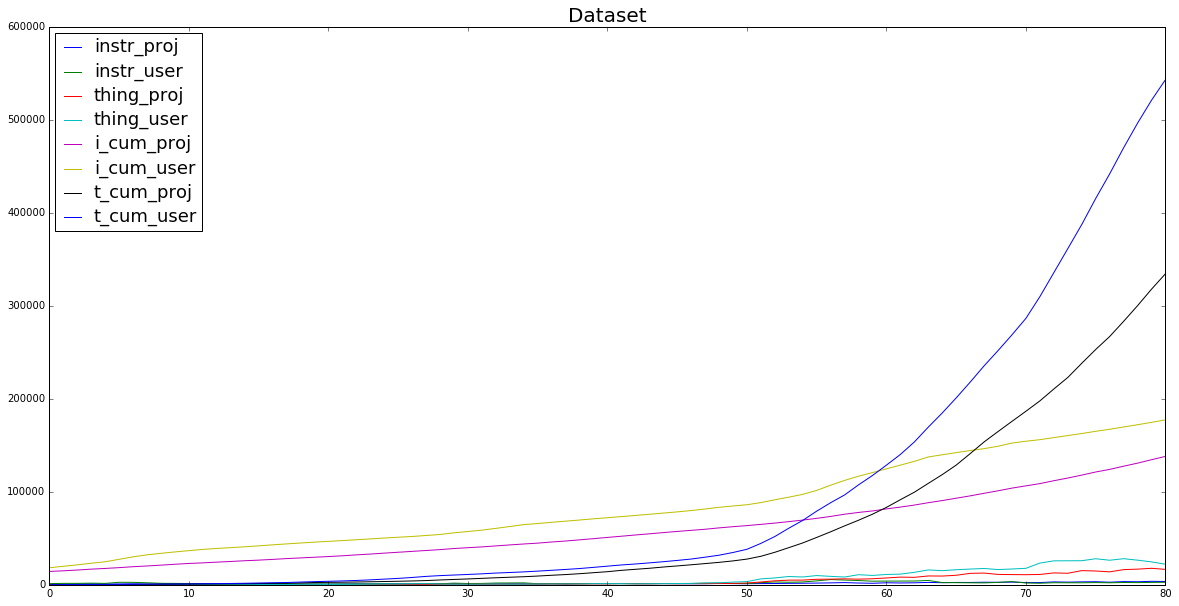

In [4]:
# Plot data
data.plot(figsize=(20, 10)).set_title('Dataset', color='k', size='20')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='18')

In [5]:
# Delete unnecessary columns
del data["i_cum_proj"]
del data["i_cum_user"]
del data["t_cum_proj"]
del data["t_cum_user"]

,date,instr_proj,instr_user,thing_proj,thing_user
0,2008-10-01,718,1240,5.0,7.0
1,2008-11-01,678,1525,126.0,239.0
2,2008-12-01,818,1553,49.0,98.0
3,2009-01-01,964,1751,36.0,44.0
4,2009-02-01,760,1520,31.0,39.0
5,2009-03-01,865,2710,65.0,70.0
...,...,...,...,...,...
75,2015-01-01,3322,2395,14834.0,28035.0
76,2015-02-01,2805,2193,13920.0,26414.0
77,2015-03-01,3441,2484,16321.0,28068.0


[None, None, None, None]

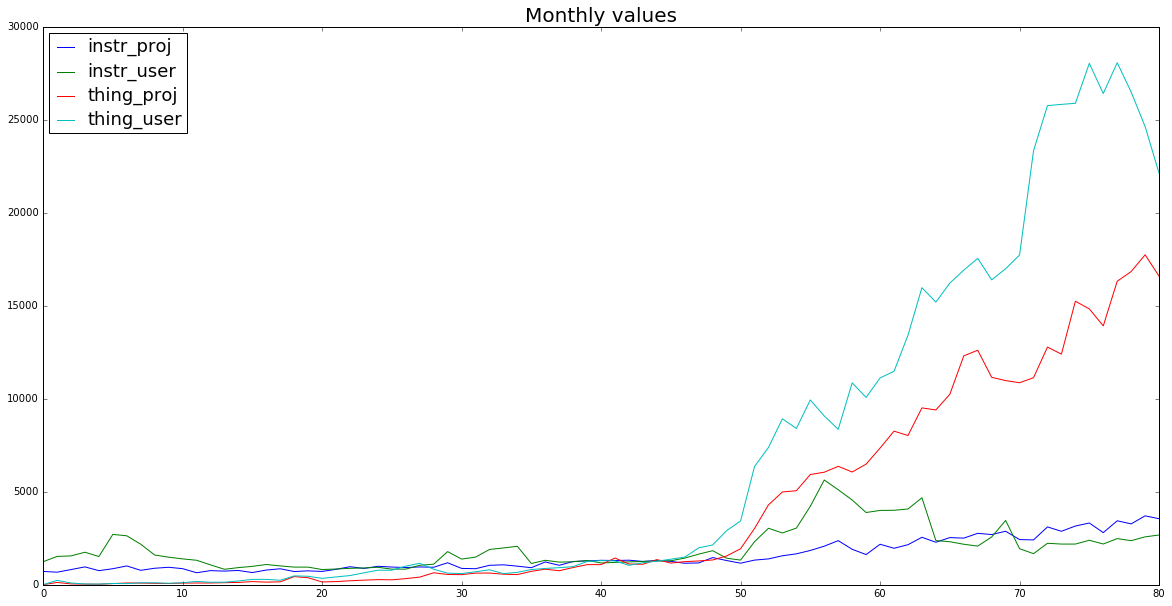

In [6]:
# Display a snippet of the cleaned dataset
pd.options.display.max_rows = 12
display(data)
data.plot(figsize=(20, 10)).set_title('Monthly values', color='k', size='20')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='18')

In [7]:
# Some basic stats about the dataset
data.describe().round()

,instr_proj,instr_user,thing_proj,thing_user
count,81.0,81.0,81.0,81.0
mean,1536.0,1978.0,4129.0,6705.0
std,846.0,1092.0,5347.0,8940.0
min,649.0,821.0,5.0,7.0
25%,882.0,1219.0,216.0,459.0
50%,1229.0,1601.0,1085.0,1190.0
75%,2155.0,2377.0,7351.0,11122.0
max,3707.0,5634.0,17741.0,28068.0


[None, None]

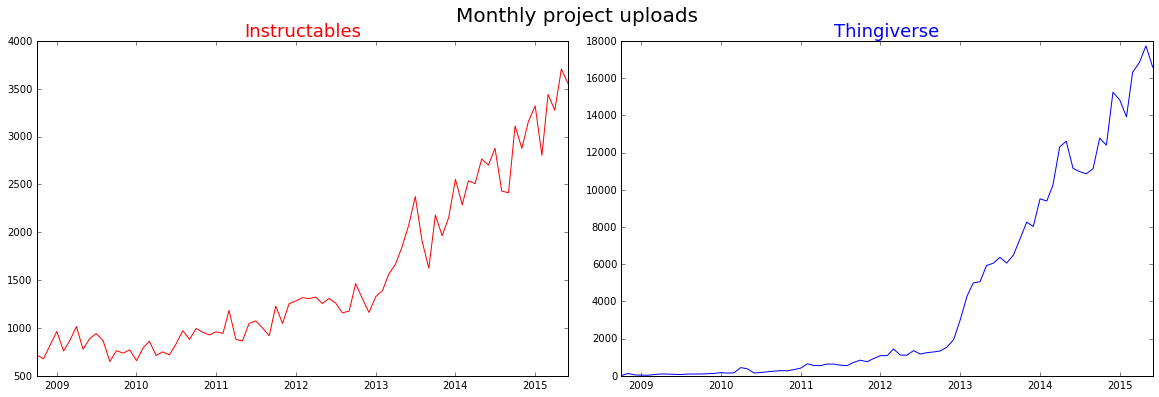

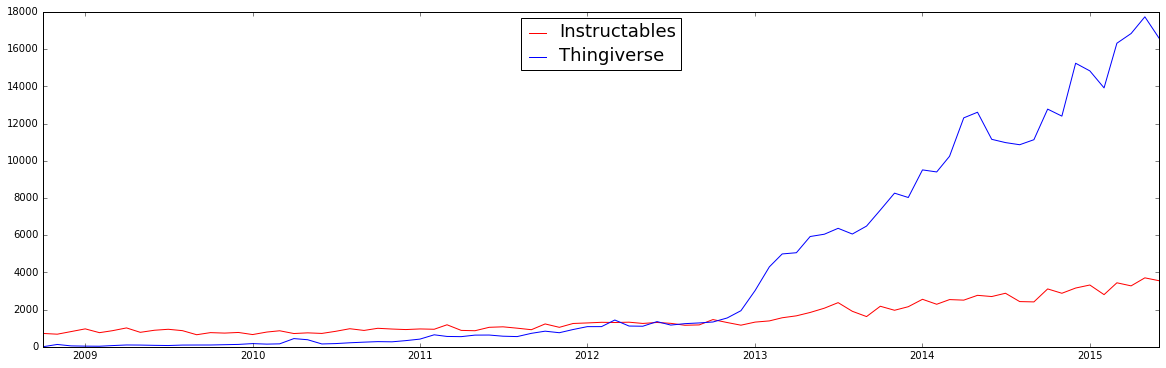

In [8]:
# Plotting projects
fig1 = plt.figure(figsize=(20, 6), dpi=300)
plt.suptitle('Monthly project uploads', size='20')
ax1 = fig1.add_subplot(121)
ax1.set_title('Instructables', color='r', size='18')
ax1.plot(data.date, data.instr_proj, 'r-')
ax2 = fig1.add_subplot(122)
ax2.set_title('Thingiverse', color='b', size='18')
ax2.plot(data.date, data.thing_proj, 'b-')
fig1.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
fig = plt.figure(figsize=(20, 6), dpi=300)
ax3 = fig.add_subplot(111)
l1, l2 = ax3.plot(data.date, data.instr_proj, 'r-', data.date, data.thing_proj, 'b-')
ax3.legend((l1, l2), ('Instructables', 'Thingiverse'), loc="upper center", frameon=True)
plt.setp(plt.gca().get_legend().get_texts(), fontsize='18')

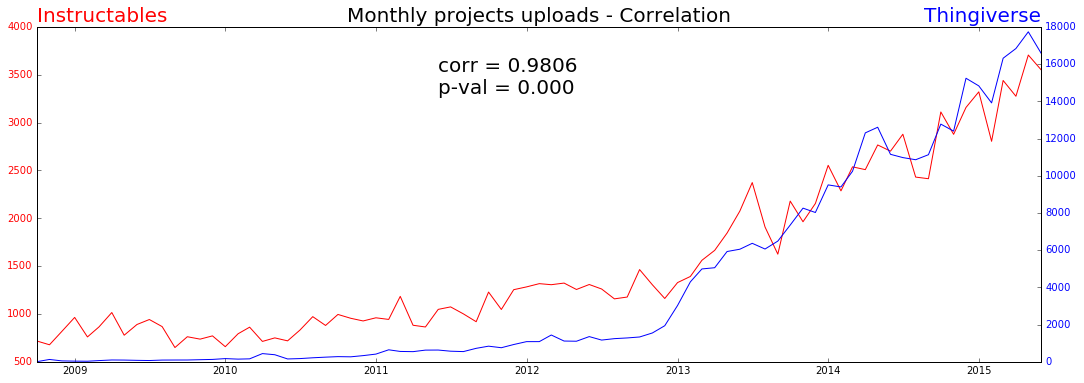

In [9]:
fig2 = plt.figure(num=None, figsize=(18, 6), dpi=300, facecolor='w', edgecolor=None)
plt.title("Instructables", color='r',size='20', loc='left')
plt.title("Thingiverse", color='b', size='20', loc='right')
plt.title("Monthly projects uploads - Correlation", size='20')
ax1 = fig2.add_subplot(111)
ax1.plot(data.date, data.instr_proj, 'r-')
for tl in ax1.get_yticklabels():
    tl.set_color('r')
ax2 = fig2.add_subplot(111)
ax2 = ax1.twinx()
ax2.plot(data.date, data.thing_proj, 'b-')
for tl in ax2.get_yticklabels():
    tl.set_color('b')

#Pearson calculation of project's distributions
proj_corr = pearsonr(data.instr_proj, data.thing_proj)
proj_rho = round(proj_corr[0],4)
proj_p = format(round(proj_corr[1],4), '.3f')
textx = data.date.values[round(len(data)*0.40)]
corr1 = fig2.add_subplot(111)
corr1 = ax1.twinx()#.twiny()
corr1.axes.get_yaxis().set_visible(False)
#ax2.tick_params(axis='x', which='both', top='off', bottom='off', labelbottom='off', labeltop='off')
#plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05), )
#corr1.xticks([])
#corr1.yticks([])

corr1.text(textx, 0.8, "{} {}\n{} {}".format("corr =", proj_rho, "p-val =", proj_p), size='20')

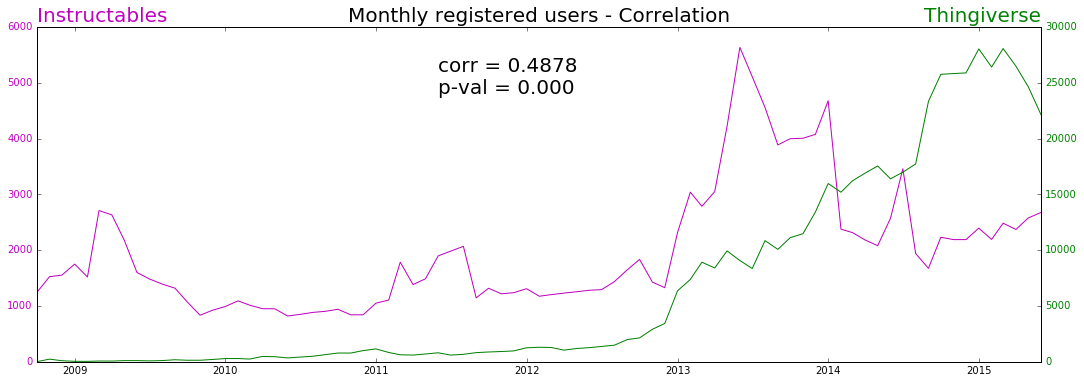

In [10]:
#Plotting users
fig3 = plt.figure(num=None, figsize=(18, 6), dpi=300, facecolor='w', edgecolor=None)
plt.title("Instructables", color='m',size='20', loc='left')
plt.title("Thingiverse", color='g', size='20', loc='right')
plt.title("Monthly registered users - Correlation", size='20')
ax3 = fig3.add_subplot(111)
ax3.plot(data.date, data.instr_user, 'm-')
for tl in ax3.get_yticklabels():
    tl.set_color('m')
ax4 = fig3.add_subplot(111)
ax4 = ax3.twinx()
ax4.plot(data.date, data.thing_user, 'g-')
for tl in ax4.get_yticklabels():
    tl.set_color('g')

#Pearson calculation of user's distributions
user_corr = pearsonr(data.instr_user, data.thing_user)
user_rho = round(user_corr[0],4)
user_p = format(round(user_corr[1],4), '.3f')
corr2 = fig3.add_subplot(111)
corr2 = ax3.twinx()
corr2.axes.get_yaxis().set_visible(False)
corr2.text(textx, 0.8, "{} {}\n{} {}".format("corr =", user_rho, "p-val =", user_p), size='20')

In [11]:
data1 = pd.DataFrame(data.corr()).round(4)
pt = itable.PrettyTable(data1, tstyle=itable.TableStyle(theme="basic"), header_row=True)
pt.set_cell_style(style=back_y, rows=[0], cols=[2])
pt.set_cell_style(style=back_y, rows=[1], cols=[3])
pt

,instr_proj,instr_user,thing_proj,thing_user
instr_proj,1.0,0.5531,0.9806,0.9621
instr_user,0.5531,1.0,0.5156,0.4878
thing_proj,0.9806,0.5156,1.0,0.9842
thing_user,0.9621,0.4878,0.9842,1.0


In [12]:
pt.update_row_header_style(color="white", indices=[0,2])
pt.update_col_header_style(color="white", indices=[1,3])
pt.set_cell_style(style=w, rows=[0,1,2,3], cols=[0,1,2,3])
pt.set_cell_style(style=back_y, rows=[0], cols=[2])
pt.set_cell_style(style=back_y, rows=[1], cols=[3])
pt.set_cell_style(style=r, rows=[1], cols=[0,2])
pt.set_cell_style(style=g, rows=[3], cols=[0,2])
pt

,instr_proj,instr_user,thing_proj,thing_user
instr_proj,1.0,0.5531,0.9806,0.9621
instr_user,0.5531,1.0,0.5156,0.4878
thing_proj,0.9806,0.5156,1.0,0.9842
thing_user,0.9621,0.4878,0.9842,1.0
